RMSE: 839.1638782705273


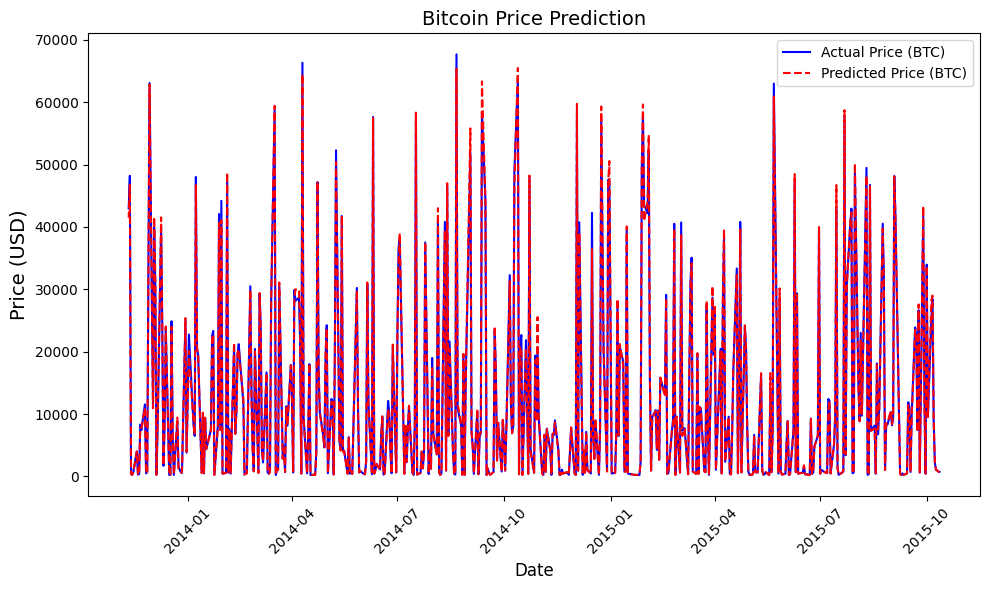

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d')

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y')
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float)
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = pd.to_datetime(btc_df['Date']).dt.year
btc_df['Month'] = pd.to_datetime(btc_df['Date']).dt.month
btc_df['Day'] = pd.to_datetime(btc_df['Date']).dt.day
btc_df['Weekday'] = pd.to_datetime(btc_df['Date']).dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

plt.figure(figsize=(10, 6))

plt.plot(merged_df['Date'].iloc[-len(y_test):], y_test, label='Actual Price (BTC)', color='blue')
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_pred, label='Predicted Price (BTC)', color='red', linestyle='--')

plt.title('Bitcoin Price Prediction', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [31]:
print(f"학습 데이터 날짜 범위: {merged_df['Date'].iloc[:len(X_train)].min()} - {merged_df['Date'].iloc[:len(X_train)].max()}")
print(f"테스트 데이터 날짜 범위: {merged_df['Date'].iloc[len(X_train):].min()} - {merged_df['Date'].iloc[len(X_train):].max()}")

학습 데이터 날짜 범위: 2015-10-13 00:00:00 - 2023-06-01 00:00:00
테스트 데이터 날짜 범위: 2013-11-11 00:00:00 - 2015-10-12 00:00:00


RMSE: 52.74767842523168


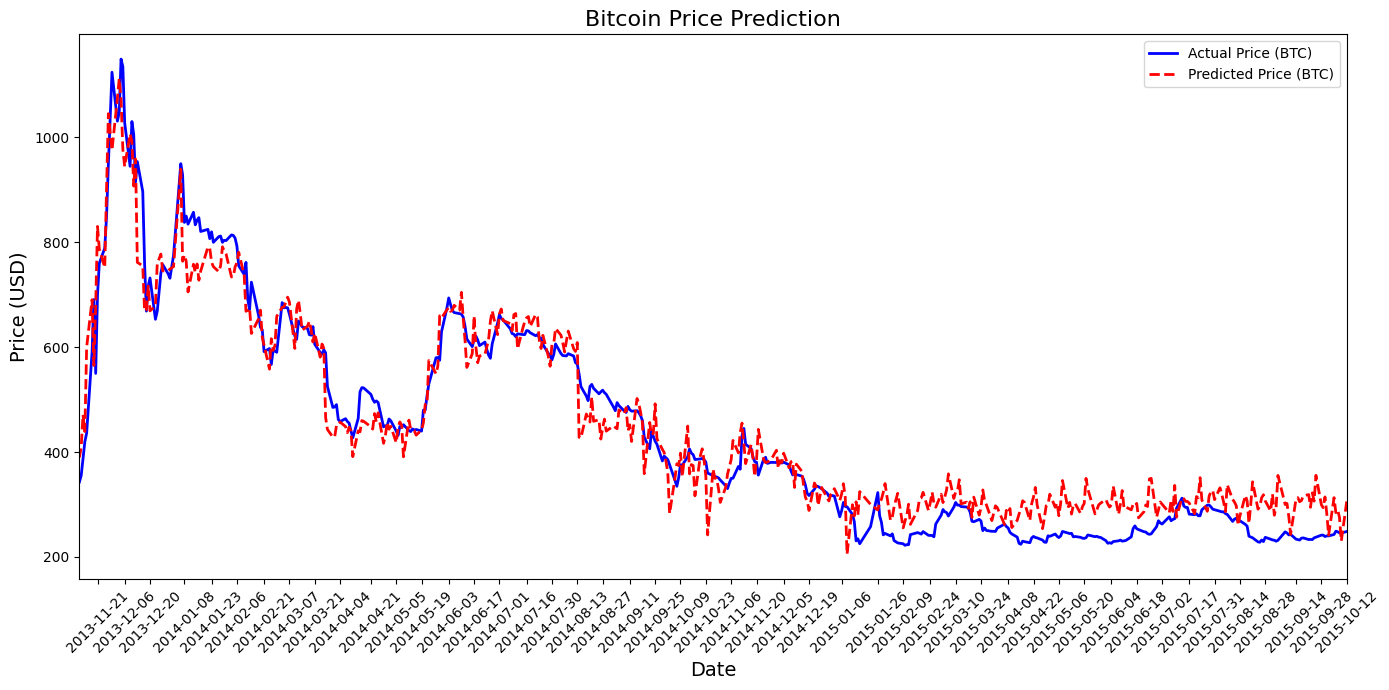

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]  
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d') 

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y') 
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float) 
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)  

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = pd.to_datetime(btc_df['Date']).dt.year
btc_df['Month'] = pd.to_datetime(btc_df['Date']).dt.month
btc_df['Day'] = pd.to_datetime(btc_df['Date']).dt.day
btc_df['Weekday'] = pd.to_datetime(btc_df['Date']).dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

plt.figure(figsize=(14, 7))

plt.plot(merged_df['Date'].iloc[-len(y_test):], y_test, label='Actual Price (BTC)', color='blue', linewidth=2)
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_pred, label='Predicted Price (BTC)', color='red', linestyle='--', linewidth=2)

plt.title('Bitcoin Price Prediction', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()

date_labels = merged_df['Date'].iloc[-len(y_test):]
plt.xticks(date_labels[::10], rotation=45)  

plt.xlim(date_labels.min(), date_labels.max())

plt.tight_layout()
plt.show()



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Optimized XGBoost RMSE: 50.33194281465232


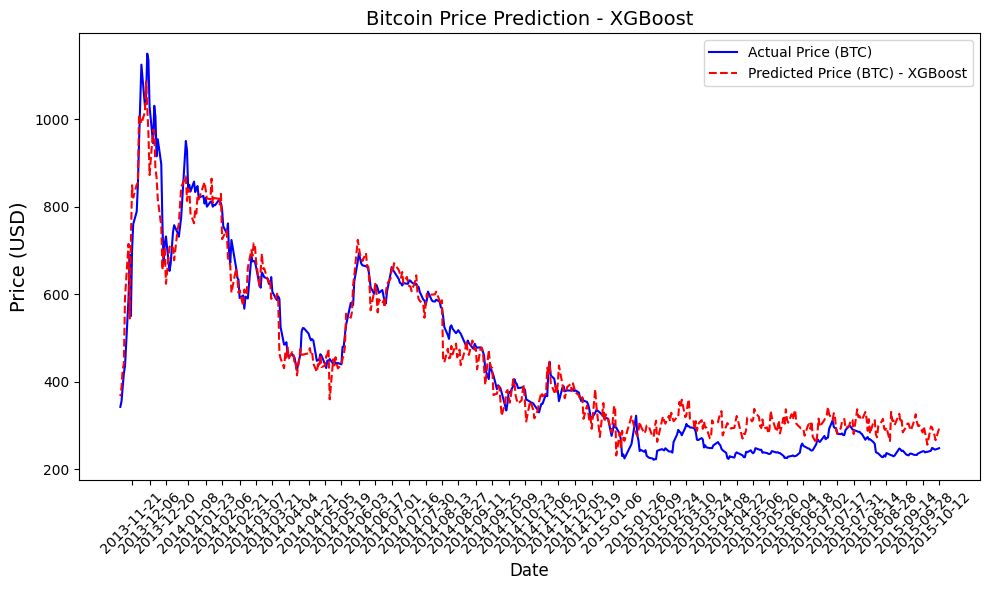

In [35]:
# 하이퍼 파라미터 최적화 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]  
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d') 

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y') 
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float) 
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)  

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = btc_df['Date'].dt.year
btc_df['Month'] = btc_df['Date'].dt.month
btc_df['Day'] = btc_df['Date'].dt.day
btc_df['Weekday'] = btc_df['Date'].dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300, 500],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
}

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model_xgb = grid_search.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"Optimized XGBoost RMSE: {rmse_xgb}")

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_test, label='Actual Price (BTC)', color='blue')
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_pred_xgb, label='Predicted Price (BTC) - XGBoost', color='red', linestyle='--')
plt.title('Bitcoin Price Prediction - XGBoost', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.xticks(date_labels[::10], rotation=45)  
plt.tight_layout()
plt.show()


Random Forest RMSE: 35.96528975058352


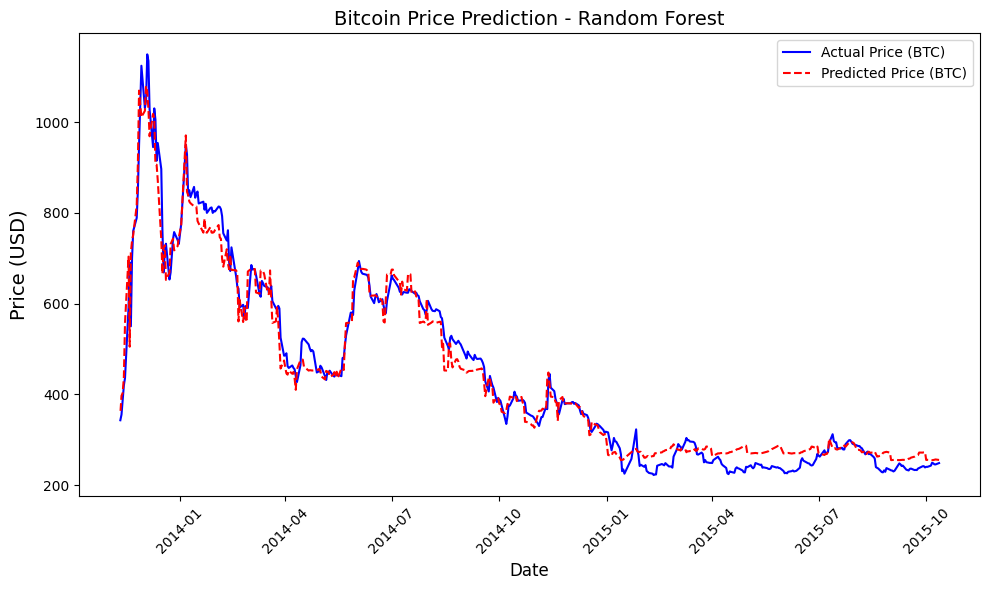

In [ ]:
# 모델 변경(랜덤 포레스트 )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]  
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d') 

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y') 
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float) 
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)  

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = btc_df['Date'].dt.year
btc_df['Month'] = btc_df['Date'].dt.month
btc_df['Day'] = btc_df['Date'].dt.day
btc_df['Weekday'] = btc_df['Date'].dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_rf}")

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_test, label='Actual Price (BTC)', color='blue')
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_pred_rf, label='Predicted Price (BTC)', color='red', linestyle='--')
plt.title('Bitcoin Price Prediction - Random Forest', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
